In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [3]:
from observer import Observer, Cone
from inks import Neugebauer, InkGamut, CellNeugebauer, bucket_points, get_metamers

In [71]:
import colour
colour_d65 = colour.SDS_ILLUMINANTS.get('D65')
d65 = Spectra(data=colour_d65.values / np.max(colour_d65.values), wavelengths=colour_d65.wavelengths)

In [72]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [73]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut_d65 = InkGamut(cijk_neug, illuminant=d65)  

In [133]:
m10_10_60_90 = []
m35_100_00_25 = []
m40_90_05_60 = []

## 1/09 data

In [134]:
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        if row[2] == "10 10 60 90":      
            m10_10_60_90.append(spectra)
        elif row[2] == "35 100 00 25":      
            m35_100_00_25.append(spectra)
        elif row[2] == "40 90 05 60":
            m40_90_05_60.append(spectra)

In [135]:
def plot_colors(lst):
    # plot with newer = darker
    for i, s in enumerate(lst):
        s.plot(color='black', alpha=((i+1)/float(len(lst))))

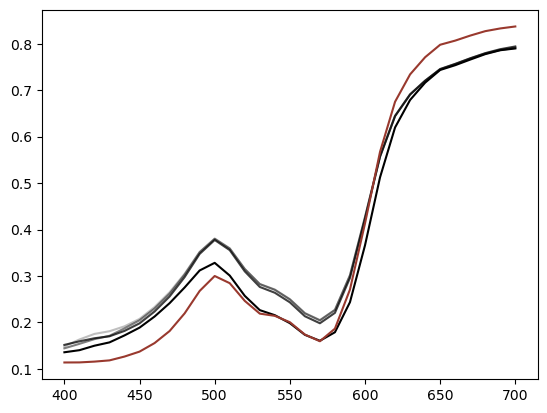

In [136]:
plot_colors(m10_10_60_90)  # I probably scanned out of order here
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)).plot()

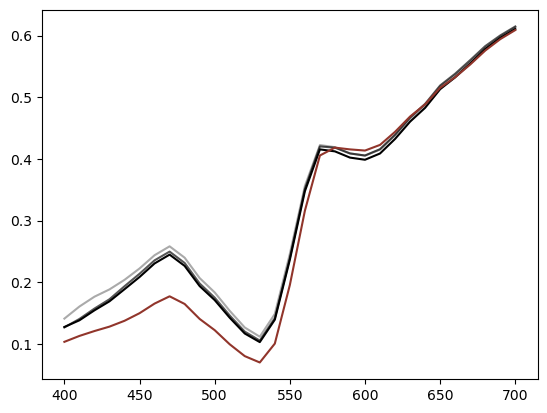

In [137]:
plot_colors(m35_100_00_25)
cijk_gamut_d65.get_spectra((0.35, 1, 0, 0.25)).plot()

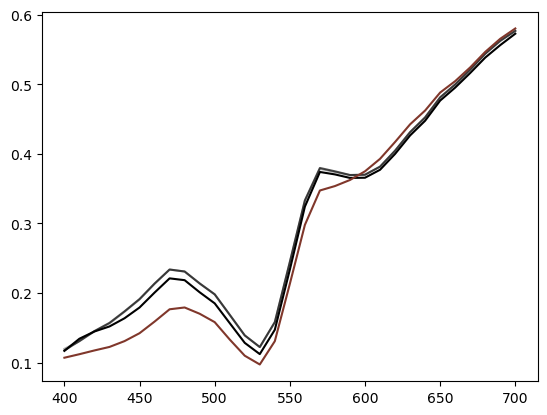

In [138]:
plot_colors(m40_90_05_60)
cijk_gamut_d65.get_spectra((0.4, 0.9, 0.05, 0.6)).plot()

## 1/10 data

In [139]:
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        if row[2] == "10 10 60 90":      
            m10_10_60_90.append(spectra)
        elif row[2] == "35 100 00 25":      
            m35_100_00_25.append(spectra)
        elif row[2] == "40 90 05 60":
            m40_90_05_60.append(spectra)

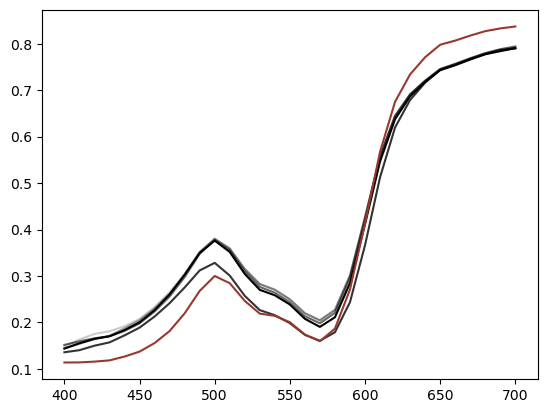

In [140]:
plot_colors(m10_10_60_90)
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)).plot()

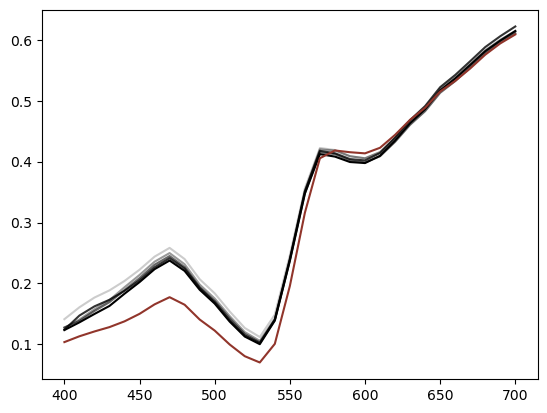

In [141]:
plot_colors(m35_100_00_25)
cijk_gamut_d65.get_spectra((0.35, 1, 0, 0.25)).plot()

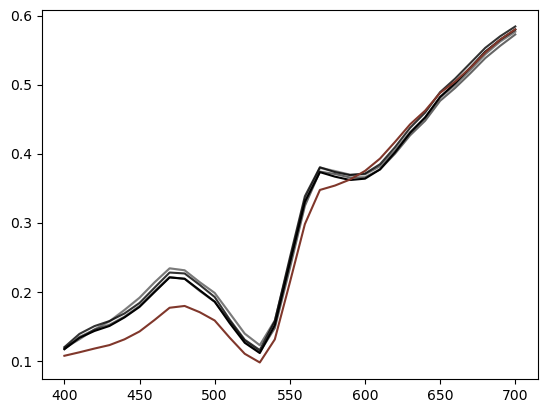

In [142]:
plot_colors(m40_90_05_60)
cijk_gamut_d65.get_spectra((0.4, 0.9, 0.05, 0.6)).plot()

In [143]:
primaries = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        if row[2] == "Consistency":      
            primaries[name] = spectra

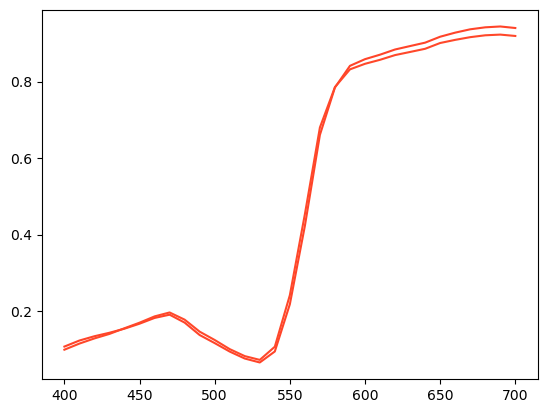

In [144]:
cijk["0200"].plot()
primaries["Orange"].plot()

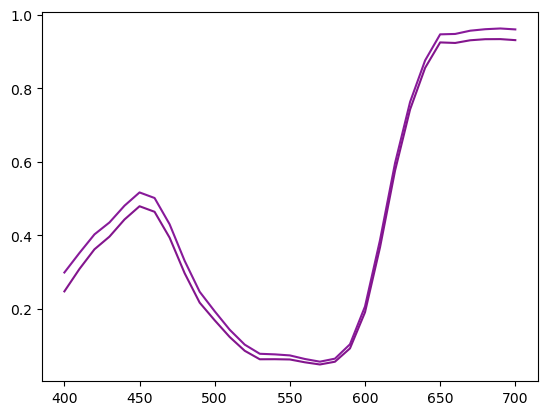

In [145]:
cijk["0020"].plot()
primaries["Violet"].plot()

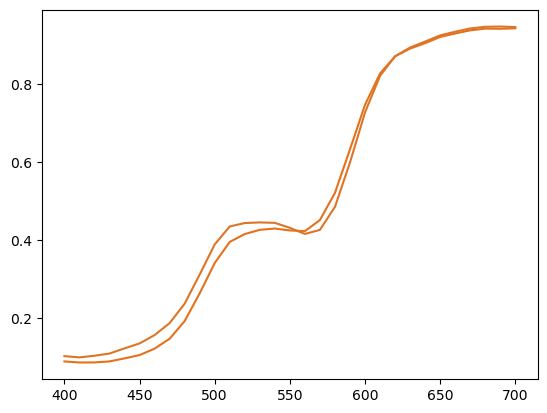

In [146]:
cijk["0002"].plot()
primaries["Peach"].plot()

# 1/11 data

In [147]:
m10_10_70_100 = []
m30_100_20_30 = []

In [148]:
mets = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        if name == "10 10 70 100":
            m10_10_70_100.append(spectra)
        elif name == "30 100 20 30":
            m30_100_20_30.append(spectra)

In [149]:
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        name = row[4]
        print(name)
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        if name == "10,10,70,100":      
            m10_10_70_100.append(spectra)
        elif name == "30,100,20,30":
            m30_100_20_30.append(spectra)

10,10,70,100
30,100,20,30


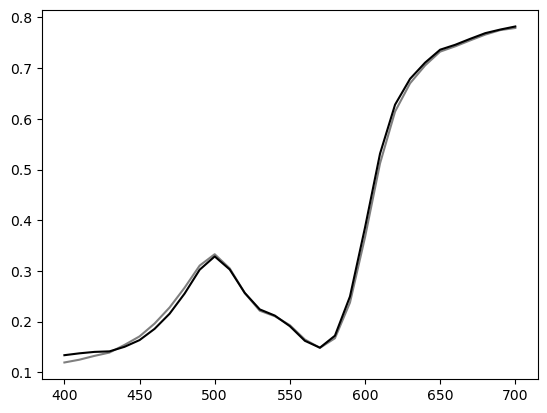

In [150]:
plot_colors(m10_10_70_100)

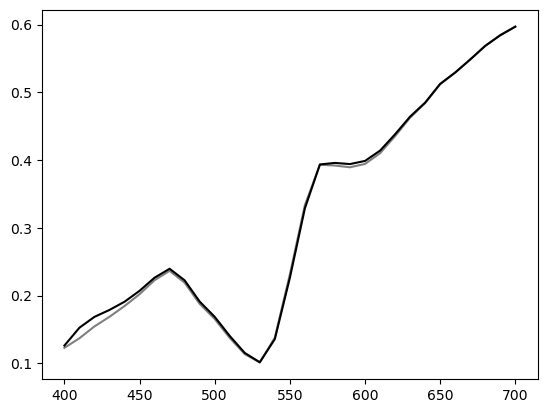

In [151]:
plot_colors(m30_100_20_30)